In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()
from pathlib import Path
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

In [22]:
rmsf_dir = Path(Path.home(), "Documents/xray/sample_bench/data/rmsf")
# fig_file = Path(Path.home(),"Desktop/rmsf.png")
fig_dir = Path(Path.home(), "Documents/xray/sample_bench/figures")
fig_file = Path(fig_dir, "single_state_rmsf_0_3.png")


In [3]:
rmsf_files = list() 
rmsf_files.append(Path(rmsf_dir, "788243.csv"))
rmsf_files.append(Path(rmsf_dir, "788244.csv"))
rmsf_files.append(Path(rmsf_dir, "788245.csv"))
rmsf_files.append(Path(rmsf_dir, "788246.csv"))


In [4]:
rmsf_dfs = list() 
for rmsf_file in rmsf_files: 
    rmsf_df = pd.read_csv(rmsf_file, index_col=0)
    rmsf_dfs.append(rmsf_df)

In [5]:
if len(rmsf_dfs)%2 == 1: 
    n_row = len(rmsf_dfs)//2+1
else: 
    n_row = len(rmsf_dfs)//2
n_row

2

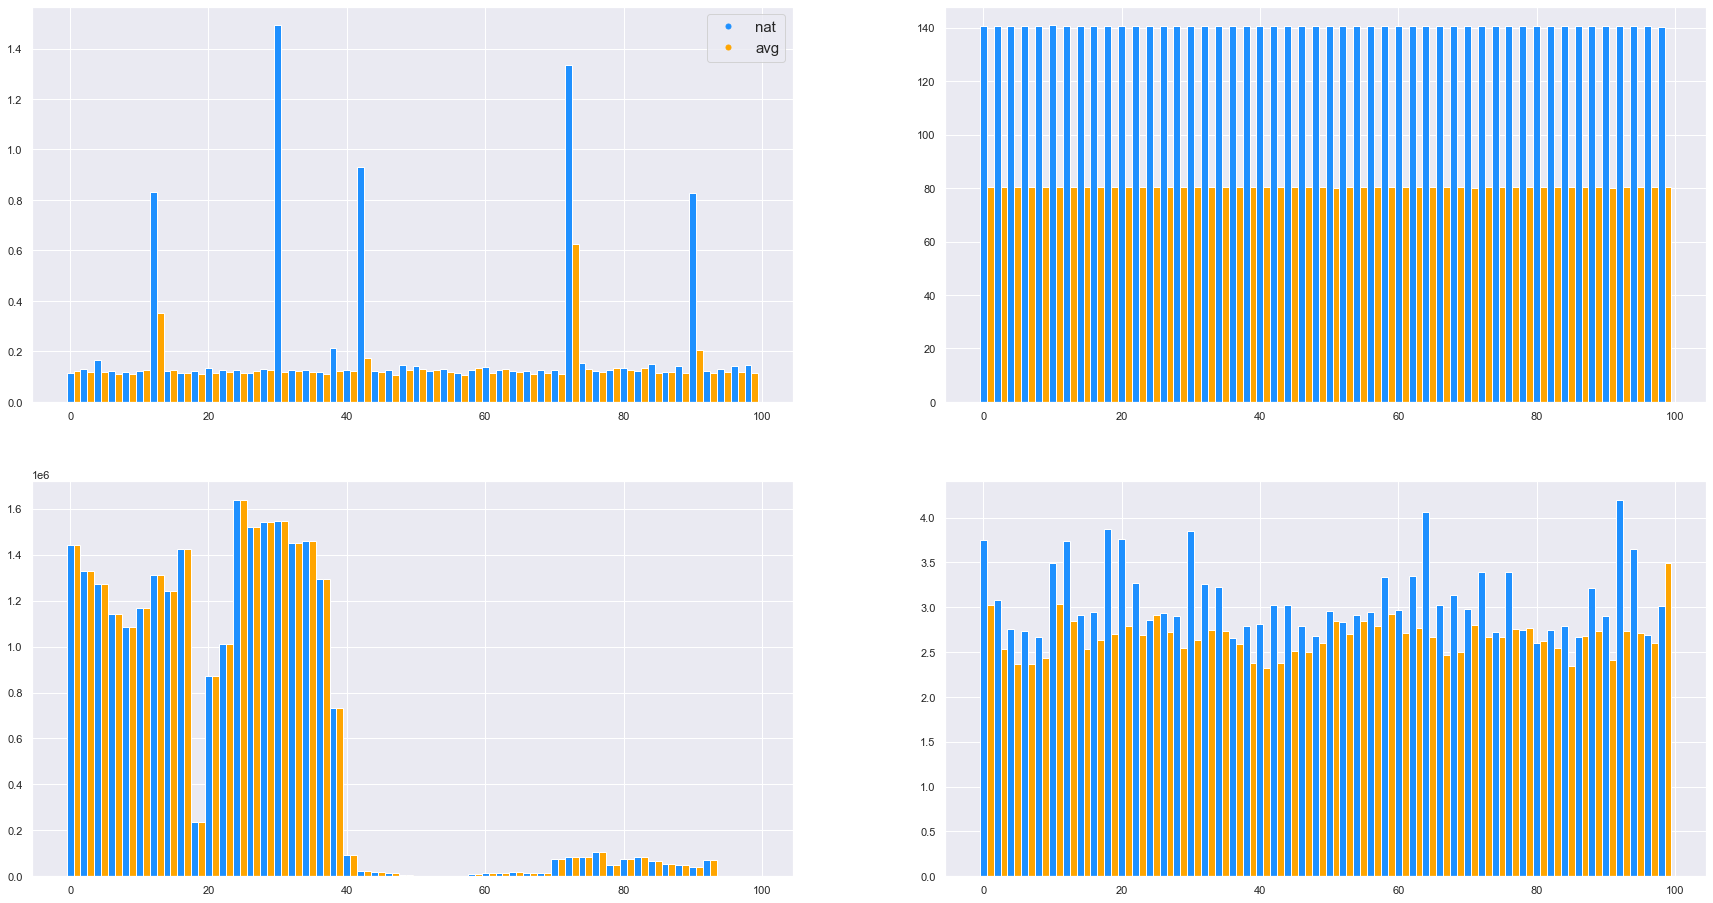

In [23]:
fig, axs = plt.subplots(n_row, 2, figsize=(30,8*n_row))

cs = list() 
cs.append(mcolors.CSS4_COLORS["dodgerblue"])
cs.append(mcolors.CSS4_COLORS["orange"])

alpha = .5

custom_legend = list() 
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=cs[0], linestyle='None'))
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=cs[1], linestyle='None'))

y_pos = list(range(len(rmsf_df)*2))
x_labels = [str(res_id) for res_id in list(rmsf_df["index"])]

for i in range(len(rmsf_dfs)):
    ax1 = axs[i//2][i%2]
    rmsf_df = rmsf_dfs[i]
    xs = list() 
    ys = list() 
    colors = list() 
    for j in range(len(rmsf_df["nat"])): 
        xs.append(rmsf_df.iloc[j, rmsf_df.columns.get_loc("index")])
        xs.append(rmsf_df.iloc[j, rmsf_df.columns.get_loc("index")])

        ys.append(rmsf_df.iloc[j, rmsf_df.columns.get_loc("nat")])
        ys.append(rmsf_df.iloc[j, rmsf_df.columns.get_loc("avg")])
        
        colors.append(cs[0])
        colors.append(cs[1])
    
#     ax1.xticks(y)
    if i == 0: 
        ax1.legend(custom_legend, ['nat', 'avg'], loc="upper right", fontsize=15)
        
    ax1.bar(y_pos, ys, color=colors, width=1)


# plt.show()
plt.savefig(fig_file)

